<a href="https://colab.research.google.com/github/ericariyanto/mti/blob/main/artificial-intelligence/PJJ_MTI_1_AI_4_Tugas_Perbandingan_KNN_dan_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table>
    <tr>
        <td>
          <div style="border-radius: 50%; overflow: hidden; width: 100px; height: 100px;">
            <img src="https://media.licdn.com/dms/image/C5603AQHvZt7Bp1ADsA/profile-displayphoto-shrink_200_200/0/1517430438530?e=1702512000&v=beta&t=fu2EPYzeAIgk3Ikev1S0iZrYf9cMVKKnQ9lhWWyrEnE" alt="Image" width="100" height="100" style="border-radius:50%;">
          </div>
        </td>
        <td>
            <h3><b>Eric Ariyanto</b></h3>
            <p><b>Artificial Intelligence - PJJ MTI</b></p>
            <p>NIM : 23.55.1373</p>
            <p>eric@students.amikom.ac.id</p>
        </td>
    </tr>
</table>


## TUGAS #1

### M**embandingkan Algoritma K-NN vs Naive Bayes**

#### Instuksi Tugas :


*   Buatlah program Klasifikasi untuk Dataset di atas menggunakan :
    * k-Nearest Neighbor (k-NN)
    * Gaussian Naive Bayes
*   Simpulkan mana yang lebih baik untuk menyelesaikan permasalahan dataset di atas
*   Dataset "**Pima Indians Diabetes Database**" :<br>
    https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/



### Persiapan Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import general library

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [3]:
url = "/content/drive/MyDrive/Labs/Dataset/pima-indians-diabetes.csv"

# load dataset using pandas
dataset = pd.read_csv(url)

# show top 5 data
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Split dataset into attributes (x) and class (y)

x = dataset.iloc[:, :-1].values # all column, except Outcome
y = dataset.iloc[:, 8].values # Outcome

In [5]:
# show attributes x

x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [6]:
# show class y

y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [7]:
# Train Test Split

# split data train 80%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

# show test
print("Dataset : ", y.size, "\nTrain : ", y_train.size, "\nTest : ", y_test.size)

Dataset :  768 
Train :  614 
Test :  154


In [22]:
# Scaling attributes, penggunaan MinMaxScaler atau StandardScaler dapat mempengaruhi Accuracy
# Untuk KNN pada dataset ini, accuracy lebih baik jika menggunakan StandardScaler
# Namun karena tugas ini untuk membandingkan metode KNN dengan Gaussian Naive Bayes
# sehingga variabel lain akan dibuat sama
# untuk Scaler akan menggunakan Standard Scaler

# Scaling attributes using Standard Scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


# Aktifkan jika ingin menggunakan MinMaxScaler
# # Scaling attributes using MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(x)

# x = scaler.transform(x)

### **k-NN Nearest Neighbor**

In [23]:
# import library for k-NN

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [24]:
# training and predictions

from sklearn.neighbors import KNeighborsClassifier
import numpy as np

error = []
knn_k_len = len(x_train) // 2

# calculating error for K value between 1 and half data train
for i in range(1,knn_k_len):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)
  pred_i = knn.predict(x_test)
  error.append(np.mean(pred_i != y_test))

In [25]:
# show error

# Find k with less error
knn_k = (np.argmin(error)) + 1

print("K pada NN dengan error terkecil :", knn_k, " dengan nilai error : ", error[knn_k-1])

K pada NN dengan error terkecil : 67  dengan nilai error :  0.18181818181818182


In [26]:
# Evaluating the Algorithm
knn = KNeighborsClassifier(n_neighbors=knn_k)
knn.fit(x_train, y_train)

knn_y_pred = knn.predict(x_test)

knn_matrix = confusion_matrix(y_test, knn_y_pred)
knn_report = classification_report(y_test, knn_y_pred, target_names=['No', 'Yes'])
knn_accuracy = accuracy_score(y_test, knn_y_pred)

In [27]:
# show accuracy and classification report

print(f"Accuracy: {knn_accuracy:.2f}")
print("\n")
print(knn_report)

Accuracy: 0.82


              precision    recall  f1-score   support

          No       0.81      0.96      0.88       107
         Yes       0.85      0.49      0.62        47

    accuracy                           0.82       154
   macro avg       0.83      0.73      0.75       154
weighted avg       0.82      0.82      0.80       154



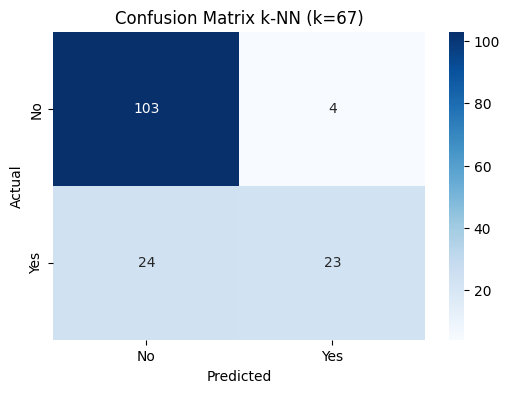

In [29]:
# Visualize the confusion matrix using a heatmap
knn_matrix_title = f'Confusion Matrix k-NN (k={knn_k})'

plt.figure(figsize=(6,4))
sns.heatmap(knn_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(knn_matrix_title)

plt.show()



---



### **Gaussian Naive Bayes**

In [30]:
# import library for Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [31]:
# create and train a Gaussian Naive Bayes Classifier

gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [32]:
# Make Prediction using Gaussian Naive Bayes Classifier

gnb_y_pred = gnb.predict(x_test)

In [33]:
# Evaluating the Algorithm

gnb_accuracy = accuracy_score(y_test, gnb_y_pred)
gnb_matrix = confusion_matrix(y_test, gnb_y_pred)
gnb_report = classification_report(y_test, gnb_y_pred, target_names=['No', 'Yes'])

In [34]:
# show accuracy and classification report

print(f"Accuracy: {gnb_accuracy:.2f}")
print("\n")
print(gnb_report)

Accuracy: 0.79


              precision    recall  f1-score   support

          No       0.84      0.87      0.85       107
         Yes       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154



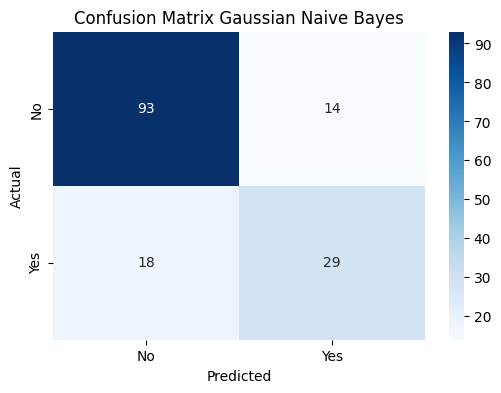

In [35]:
# Visualize the confusion matrix using a heatmap
gnb_matrix_title = f'Confusion Matrix Gaussian Naive Bayes'

plt.figure(figsize=(6,4))
sns.heatmap(gnb_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(gnb_matrix_title)

plt.show()



---




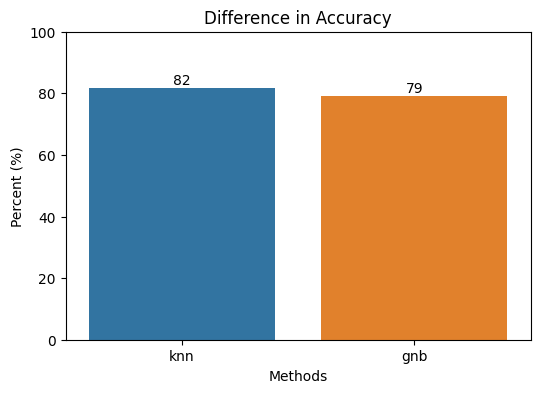

In [36]:
# Visualize Accuracy between k-NN and Gaussian Naive Bayes

accuracy = { 'knn' : knn_accuracy, 'gnb' : gnb_accuracy }

# change accuracy in percent
for key in accuracy:
    accuracy[key] *= 100

plt.figure(figsize=(6,4))

ax = sns.barplot(x=list(accuracy.keys()), y=list(accuracy.values()))
ax.set_ylim([0, 100])

for i in ax.containers:
    ax.bar_label(i, fmt='%.0f')

plt.xlabel('Methods')
plt.ylabel('Percent (%)')
plt.title('Difference in Accuracy')

plt.show()

### **Kesimpulan**

Berdasarkan hasil percobaan diatas, dapat disimpulkan bahwa :
<br><br>

**k-NN (Nearest Neighbor)** dengan `k=67` **Lebih baik** untuk menyelesaikan permasalahan dataset *Pima Indians Diabetes Database* dengan **Accuracy Score** sebesar **82%**, unggul **dibandingkan** **Gaussian Naive Bayes** yang memiliki Accuracy Score sebesar **79%**.
<br><br>
Namun, meskipun lebih rendah dalam Accuracy, **Gaussian Naive Bayes** **lebih stabil** karena tidak terpengaruh oleh preprocessing seperti pemilihan Scalar, serta waktu yang dibutuhkan untuk mendapatkan hasil prediksi cenderung **lebih cepat** ( tidak perlu mencari nilai `k` yang tepat seperti Nearest Neighbor )

